In [155]:
from fontlib import Rect, Char
from PIL import Image, ImageFont
import cv2

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
texture.close()

In [1]:
font = ImageFont.truetype("fonts/Stay Wildy.ttf", 200)
with Image.open("font_texture.jpg") as texture:
    char = Char.from_font(char="A", 
                          font=font, 
                          font_color=(0, 0, 0), 
                          image_size=(250, 250),
                          draw_borders=True,
                          texture=texture)
char.image

NameError: name 'ImageFont' is not defined

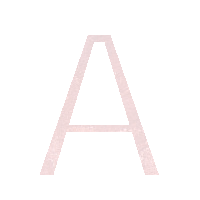

In [120]:
char.image

In [23]:
char.image.save("char.png", "PNG")

In [151]:
char = char.apply_homography()

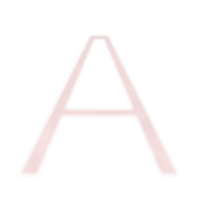

In [148]:
char.image

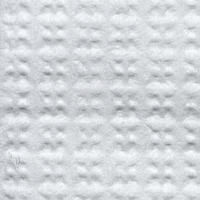

In [158]:
bg_img = Image.open("pattern.jpg")
char = char.add_background(bg_img)
char.image

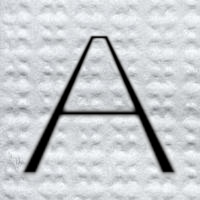

In [16]:
char.image

In [28]:
foreground = cv2.imread("char.png")
background = cv2.imread("pattern.png")
alpha = cv2.imread("puppets_alpha.png")
 
# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)
 
# Normalize the alpha mask to keep intensity between 0 and 1
alpha = alpha.astype(float)/255
 
# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)
 
# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)
 
# Add the masked foreground and background.
outImage = cv2.add(foreground, background)
 
# Display image
cv2.imshow("outImg", outImage/255)
    